In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ufo_data = pd.read_csv('nuforc_events.csv')
ufo_data

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20T14:15:00Z,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20T04:56:00Z,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19T23:55:00Z,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19T23:50:00Z,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19T23:29:00Z,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cylinder,NaN,I video taped a UFO off the tv (cnn/headline n...,http://www.nuforc.org/webreports/032/S32416.html
110261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rule,TX,Unknown,15 minutes,Unusual sounds and starlight distortion defini...,http://www.nuforc.org/webreports/091/S91521.html
110262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subotica,NaN,NaN,NaN,Objects was moving very fast on this about pos...,http://www.nuforc.org/webreports/086/S86594.html
110263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Key West,FL,Other,one minute,I lived on a shallow-water marshland in Key We...,http://www.nuforc.org/webreports/034/S34436.html


In [3]:
ufo_data['City, State'] = ufo_data['City'].str.cat(ufo_data['State'],sep=", ")
ufo_data = ufo_data.drop(columns=['City', 'State'])

In [4]:
location_only = ufo_data.drop(columns=['Event_URL','Year','Month','Day','Hour','Minute','Summary','Event_Time',"Event_Date", 'Shape', 'Duration'])
location_only.head(50)

,"City, State"
0,"Palmyra, NJ"
1,"Bridgeview, IL"
2,"Newton, AL"
3,"Newton, AL"
4,"Denver, CO"
5,"Cobourg (Canada), ON"
6,"Garden City, SC"
7,"North Myrtle Beach, SC"
8,"Surfside Beach, SC"
9,NaN


In [5]:
# Remove all reports that dont have specifoed location
location_only = location_only[location_only['City, State'].notna()]
location_only


,"City, State"
0,"Palmyra, NJ"
1,"Bridgeview, IL"
2,"Newton, AL"
3,"Newton, AL"
4,"Denver, CO"
...,...
110258,"Surry County, VA"
110259,"Columbus, OH"
110261,"Rule, TX"
110263,"Key West, FL"


In [6]:
# Import geocoder and geopy to extarct coordinate location of reports
import geocoder
import geopy

In [7]:
str(location_only.values[0])

"['Palmyra, NJ']"

In [64]:
import time
appended_data = []
start_time = time.time()
for rows in range(0,len(location_only)):
    g = geocoder.osm(str(location_only.values[rows]))
    diction = g.osm
    diction
   # print(diction)
    if diction == None:
        continue
    else:
        res = {key: diction[key] for key in diction.keys() & {'x', 'y'}}  
        df = pd.DataFrame.from_dict(res, orient='index')
              # store DataFrame in list
        appended_data.append(df)
# concat all dataframes from each location into two columns
appended_data = pd.concat(appended_data, axis = 1, ignore_index=True)
Lat_Long = appended_data.T
Dataframe_xy = Lat_Long.rename(columns={"x": "Longitude", "y": "Latitude"})
end_time = time.time()
print(end_time-start_time)


Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5.0)


52007.06776022911


# Creating Interactive Map

In [98]:
import numpy as np
from netCDF4 import Dataset

def Etopo(lon_area, lat_area, resolution):
  ### Input
  # resolution: resolution of topography for both of longitude and latitude [deg]
  # (Original resolution is 0.0167 deg)
  # lon_area and lat_area: the region of the map which you want like [100, 130], [20, 25]
  ###
  ### Output
  # Mesh type longitude, latitude, and topography data
  ###
  
  # Read NetCDF data
  data = Dataset("ETOPO1_Ice_g_gdal.grd", "r")
  
  # Get data
  lon_range = data.variables['x_range'][:]
  lat_range = data.variables['y_range'][:]
  topo_range = data.variables['z_range'][:]
  spacing = data.variables['spacing'][:]
  dimension = data.variables['dimension'][:]
  z = data.variables['z'][:]
  lon_num = dimension[0]
  lat_num = dimension[1]
  
  # Prepare array
  lon_input = np.zeros(lon_num); lat_input = np.zeros(lat_num)
  for i in range(lon_num):
    lon_input[i] = lon_range[0] + i * spacing[0]
  for i in range(lat_num):
    lat_input[i] = lat_range[0] + i * spacing[1]

  # Create 2D array
  lon, lat = np.meshgrid(lon_input, lat_input)
  
  # Convert 2D array from 1D array for z value
  topo = np.reshape(z, (lat_num, lon_num))
  
  # Skip the data for resolution
  if ((resolution < spacing[0]) | (resolution < spacing[1])):
    print('Set the highest resolution')
  else:
    skip = int(resolution/spacing[0])
    lon = lon[::skip,::skip]
    lat = lat[::skip,::skip]
    topo = topo[::skip,::skip]
    
  topo = topo[::-1]
  
  # Select the range of map
  range1 = np.where((lon>=lon_area[0]) & (lon<=lon_area[1]))
  lon = lon[range1]; lat = lat[range1]; topo = topo[range1]
  range2 = np.where((lat>=lat_area[0]) & (lat<=lat_area[1]))
  lon = lon[range2]; lat = lat[range2]; topo = topo[range2]
  
  # Convert 2D again
  lon_num = len(np.unique(lon))
  lat_num = len(np.unique(lat))
  lon = np.reshape(lon, (lat_num, lon_num))
  lat = np.reshape(lat, (lat_num, lon_num))
  topo = np.reshape(topo, (lat_num, lon_num))
  
  return lon, lat, topo

In [99]:
def degree2radians(degree):
  # convert degrees to radians
  return degree*np.pi/180
  
def mapping_map_to_sphere(lon, lat, radius=1):
  # this function maps the points of coords (lon, lat) to points onto the sphere of radius radius
  lon=np.array(lon, dtype=np.float64)
  lat=np.array(lat, dtype=np.float64)
  lon=degree2radians(lon)
  lat=degree2radians(lat)
  xs=radius*np.cos(lon)*np.cos(lat)
  ys=radius*np.sin(lon)*np.cos(lat)
  zs=radius*np.sin(lat)
  return xs, ys, zs

In [100]:
# Import topography data
# Select the area you want
resolution = 0.8
lon_area = [-180., 180.]
lat_area = [-90., 90.]
# Get mesh-shape topography data
lon_topo, lat_topo, topo = Etopo(lon_area, lat_area, resolution)

# Map to sphere function

In [101]:
xs, ys, zs = mapping_map_to_sphere(lon_topo, lat_topo)

In [102]:
Ctopo = [[0, 'rgb(0, 0, 70)'],[0.2, 'rgb(0,90,150)'], 
          [0.4, 'rgb(150,180,230)'], [0.5, 'rgb(210,230,250)'],
          [0.50001, 'rgb(0,120,0)'], [0.57, 'rgb(220,180,130)'], 
          [0.65, 'rgb(120,100,0)'], [0.75, 'rgb(80,70,0)'], 
          [0.9, 'rgb(200,200,200)'], [1.0, 'rgb(255,255,255)']]
cmin = -8000
cmax = 8000

In [103]:
topo_sphere=dict(type='surface',
  x=xs,
  y=ys,
  z=zs,
  colorscale=Ctopo,
  surfacecolor=topo,
  cmin=cmin,
  cmax=cmax)

In [104]:
noaxis=dict(showbackground=False,
  showgrid=False,
  showline=False,
  showticklabels=False,
  ticks='',
  title='',
  zeroline=False)

In [105]:
import plotly.graph_objs as go

titlecolor = 'white'
bgcolor = 'black'

layout = go.Layout(
  autosize=False, width=1200, height=800,
  title = '3D spherical topography map',
  titlefont = dict(family='Courier New', color=titlecolor),
  showlegend = False,
  scene = dict(
    xaxis = noaxis,
    yaxis = noaxis,
    zaxis = noaxis,
    aspectmode='manual',
    aspectratio=go.layout.scene.Aspectratio(
      x=1, y=1, z=1)),
  paper_bgcolor = bgcolor,
  plot_bgcolor = bgcolor)

In [106]:
from plotly.offline import plot

plot_data=[seis_3D_depth_up, topo_sphere]
fig = go.Figure(data=plot_data, layout=layout)
plot(fig, validate = False, filename='SphericalTopography.html',
   auto_open=True)

'SphericalTopography.html'

In [96]:
import os
from plotly.offline import plot
ratio_topo = 1.0 + topo*1e-5
xs_3d = xs*ratio_topo
ys_3d = ys*ratio_topo
zs_3d = zs*ratio_topo

topo_sphere_3d=dict(type='surface',
    x=xs_3d,
    y=ys_3d,
    z=zs_3d,
    colorscale=Ctopo,
    surfacecolor=topo,
    opacity=1.,
    cmin=cmin,
    cmax=cmax,
    showscale=False,
    hoverinfo='skip'
    )

plot_data_3DST=[topo_sphere_3d,seis_3D_depth_up]
fig = go.Figure(data=plot_data_3DST, layout=layout)

fig.update_layout(title_text = '3D spherical topography map')
os.chdir(r"C:\Users\Mo\Data Science")
plot(fig, validate = False, filename='3DSphericalTopography.html',
    auto_open=True)

'3DSphericalTopography.html'

In [74]:
# Create numpy array from coordinate dataframe    

evlon = np.array(Dataframe_xy['Longitude'])
evlat = np.array(Dataframe_xy['Latitude'])


In [75]:
# Convert to spherical coordinates
xs_ev_org, ys_ev_org, zs_ev_org = mapping_map_to_sphere(evlon, evlat)

#Create color bar in Matplotlib
import matplotlib
from matplotlib import cm

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

def MlibCscale_to_Plotly(cbar):
    cmap = matplotlib.cm.get_cmap(cbar)
    rgb = []
    norm = matplotlib.colors.Normalize(vmin=0, vmax=255)

    for i in range(0, 255):
        k = matplotlib.colors.colorConverter.to_rgb(cmap(norm(i)))
        rgb.append(k)

    Cscale = matplotlib_to_plotly(cmap, 255)
    
    return Cscale

cbar = 'jet_r'
Cscale_EQ = MlibCscale_to_Plotly(cbar)

In [76]:
# Create three-dimensional effect
ratio = 1. - 80*2e-4
xs_ev = xs_ev_org*ratio
ys_ev = ys_ev_org*ratio
zs_ev = zs_ev_org*ratio

ratio = 1.15 - 80*2e-4
xs_ev_up = xs_ev_org*ratio
ys_ev_up = ys_ev_org*ratio
zs_ev_up = zs_ev_org*ratio

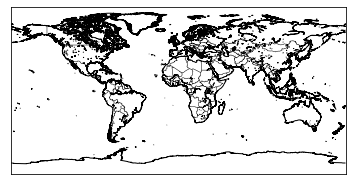

In [77]:
# Draw coast line
# Reference: https://plot.ly/~Dreamshot/9152

# Make shortcut to Basemap object, 
# not specifying projection type for this example

import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='i') 

# Functions converting coastline/country polygons to lon/lat traces
def polygons_to_traces(poly_paths, N_poly):
    ''' 
    pos arg 1. (poly_paths): paths to polygons
    pos arg 2. (N_poly): number of polygon to convert
    '''
    # init. plotting list
    lons=[]
    lats=[]

    for i_poly in range(N_poly):
        poly_path = poly_paths[i_poly]
        
        # get the Basemap coordinates of each segment
        coords_cc = np.array(
            [(vertex[0],vertex[1]) 
             for (vertex,code) in poly_path.iter_segments(simplify=False)]
        )
        
        # convert coordinates to lon/lat by 'inverting' the Basemap projection
        lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
    
        
        lats.extend(lat_cc.tolist()+[None]) 
        lons.extend(lon_cc.tolist()+[None])
        
    return lons, lats

# Function generating coastline lon/lat 
def get_coastline_traces():
    poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
    N_poly = 91  # use only the 91st biggest coastlines (i.e. no rivers)
    cc_lons, cc_lats= polygons_to_traces(poly_paths, N_poly)
    return cc_lons, cc_lats

# Function generating country lon/lat 
def get_country_traces():
    poly_paths = m.drawcountries().get_paths() # country polygon paths
    N_poly = len(poly_paths)  # use all countries
    country_lons, country_lats= polygons_to_traces(poly_paths, N_poly)
    return country_lons, country_lats
  
# Get list of of coastline, country, and state lon/lat 
cc_lons, cc_lats=get_coastline_traces()
country_lons, country_lats=get_country_traces()

#concatenate the lon/lat for coastlines and country boundaries:
lons=cc_lons+[None]+country_lons
lats=cc_lats+[None]+country_lats

xs_bd, ys_bd, zs_bd = mapping_map_to_sphere(lons, lats, radius=1.01)# here the radius is slightly greater than 1 
                                                         #to ensure lines visibility; otherwise (with radius=1)
                                                         # some lines are hidden by contours colors
        
boundaries=dict(type='scatter3d',
               x=xs_bd,
               y=ys_bd,
               z=zs_bd,
               mode='lines',
               line=dict(color='gray', width=4)
              )

In [97]:
depmax = 700.
depmin = 0.
depbin = 50.

cmin = depmin
cmax = depmax
cbin = depbin

seis_3D_depth_up = go.Scatter3d(x = xs_ev_up,
                      y = ys_ev_up,
                      z = zs_ev_up,
                      mode='markers',
                      name='measured',
                      marker = dict(
                          size = 1,
                          cmax = cmax,
                          cmin = cmin,
                          ### choose color option
                          color =  zs_ev_up,
                          ### choose color option
                          colorscale = 'speed',
                          showscale = False,
                          opacity=1.),
                      hoverinfo='skip'
                      )
# OVERLAY the geographic plot with data points
plot_data_3DST=[seis_3D_depth_up,topo_sphere_3d]
fig = go.Figure(data=plot_data_3DST, layout=layout)

fig.update_layout(title_text = '3D spherical topography map')

plot(fig, validate = False, filename='3DSphericalTopography.html',
    auto_open=True)

'3DSphericalTopography.html'

## Creating Flat geographical map

## Creating plane geographical map with outlined countries/states

In [ ]:
ratio_k = 0.85
xs_k = xs * ratio_k
ys_k = ys * ratio_k
zs_k = zs * ratio_k

black_sphere=dict(type='surface',
    x=xs_k,
    y=ys_k,
    z=zs_k,
    colorscale=Cblack,
    surfacecolor=zs_k,
    opacity=1.,
    showscale=False,
    hoverinfo='skip'
    )

In [89]:
seis_3D_depth = go.Scatter3d(x = xs_ev,
                      y = ys_ev,
                      mode='markers',
                      name='measured',
                      marker = dict(
                          size = 2,
                          cmax = cmax,
                          cmin = cmin,
                          colorbar = dict(
                              title = 'Source Depth',
                              titleside = 'right',
                              titlefont = dict(size = 16, 
                                               color = titlecolor,
                                               family='Courier New'),
                              tickmode = 'array',
                              ticks = 'outside',
                              ticktext = list(np.arange(cmin,cmax+cbin,cbin)),
                              tickvals = list(np.arange(cmin,cmax+cbin,cbin)),
                              tickcolor = titlecolor,
                              tickfont = dict(size=14, color = titlecolor,
                                             family='Courier New')
                          ),
                          ### choose color option
                          color = ys_ev,
                          ### choose color option
                          colorscale = 'speed',
                          showscale = False,
                          opacity=1.),
                      hoverinfo='skip'
                      )
# OVERLAY the geographic plot with data points
plot_data_3DST=[seis_3D_depth_up, boundaries]
fig = go.Figure(data=plot_data_3DST, layout=layout)

fig.update_layout(title_text = '3D spherical map')

plot(fig, validate = False, filename='3DSphericalMap.html',
    auto_open=True)

'3DSphericalMap.html'

In [ ]:
add_fig = make_subplots(specs=[[{"secondary_y": True}]])
adii_fig.add_trace(fig)
fig.add_trace(seis_3D_depth_up, secondary_y=True)